In [1]:
'''
nii file data and segmentation visualize
'''
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib


In [2]:
'''
nii data value analyze
'''
filename = r"file.nii.gz"
nii_img = nib.load(filename)
print("nii 3d shape is :", nii_img.shape)
img_data = nii_img.get_fdata()
types = np.unique(img_data)
print("nii values have: ", types)
print("nii values have length: ", len(types))


nii 3d shape is : (641, 641, 609)


MemoryError: Unable to allocate 1.86 GiB for an array with shape (250226529,) and data type float64

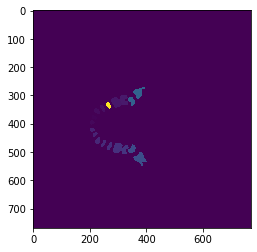

In [14]:
# data_slice = img_data[:,:,255]
data_slice = img_data[:,:,250]
sub = np.copy(data_slice)
sub[sub == 5] = 100
plt.imshow(sub)
plt.show()



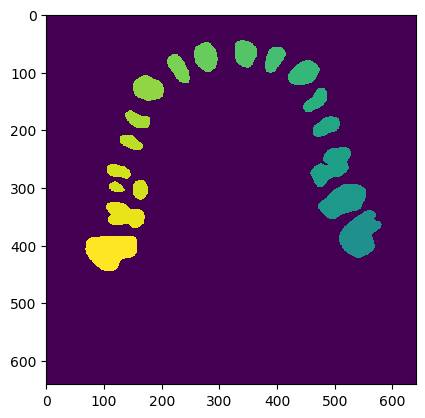

In [4]:
after = np.rot90(data_slice, 3)
plt.imshow(after)
plt.show()

In [5]:
print(data_slice.dtype)
np.unique(data_slice)

float64


array([ 0., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30.])

In [6]:
'''
Now we try to save the segmentation file
'''
import convert_images.convert_nii2img as convert_tool
nii_file = r"D:\user-syxpop\Documents\using-CVgroup\CTsegmentationTask\data-for-reference\segmentation-example\GAO JIA.nii"
output_folder = r"D:\user-syxpop\Documents\using-CVgroup\CTsegmentationTask\data-for-reference\segmentation-out\guojia-sample"
convert_tool.single_nii2image(nii_file, output_folder)
print("Finished!")

Finished!


In [7]:
'''
导出的mask可视化研究
'''
import convert_images.convert_bmptomask as convert_mask

filename = r"D:\user-syxpop\Documents\using-CVgroup\CTsegmentationTask\data-for-reference\segmentation-out\guojia-sample\GAO JIA376.png"
mask = convert_mask.read_image_tonumpy(filename)
print("mask type: ",mask.dtype)
print("mask shape: ", mask.shape)
print("mask value: ", np.unique(mask))


mask type:  uint8
mask shape:  (641, 641)
mask value:  [ 0 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]


image dtype:  uint8
mask dtype:  uint8


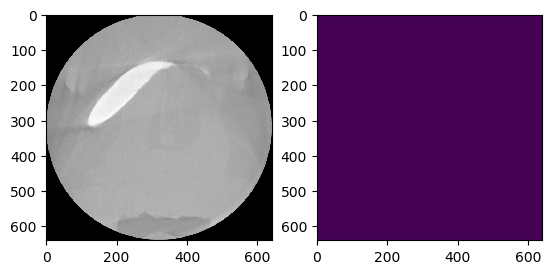

In [6]:
'''
img和mask配对研究
'''
import convert_images.convert_bmptomask as convert_mask
imgfile = r"D:\user-syxpop\Documents\using-CVgroup\CTsegmentationTask\project-unet\data\guozhenCT\imgs\GAO JIA3.png"
maskfile = r"D:\user-syxpop\Documents\using-CVgroup\CTsegmentationTask\project-unet\data\guozhenCT\masks\GAO JIA3.png"
img = convert_mask.read_image_tonumpy(imgfile)
mask = convert_mask.read_image_tonumpy(maskfile)

print("image dtype: ", img.dtype)
print("mask dtype: ",mask.dtype)

# np.expand_dims(data,axis).repeat(k,axis)
grey_img = np.expand_dims(img,2).repeat(3,2)
plt.subplot(121)
plt.imshow(grey_img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [7]:
print("image dtype: ", img.dtype)
print("mask dtype: ",mask.dtype)
print("mask value: ", np.unique(mask))

image dtype:  uint8
mask dtype:  uint8
mask value:  [0]
